In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [2]:
output_qubits = [2, 3, 4, 5, 6, 7, 8]

In [9]:
path = '../trainings/Dimension_Tests/Moons/'
file_paths = []
classical_paths = []
for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith((".json")):
            # print(name)
            if "classical" in name:
                classical_paths.append(os.path.join(root, name))
            else:
                file_paths.append(os.path.join(root, name))

data = np.zeros((len(file_paths)//len(output_qubits),len(output_qubits)))
seeds = []

for file_path in file_paths:
    with open(file_path) as json_file:
        results = json.load(json_file)
        if results["seed"] not in seeds:
            seeds.append(results["seed"])
        index = seeds.index(results["seed"])
        
        data[index, results["output_qubits"] - 2]= results["top_acc"]
       

print(seeds)
print(data)
print(np.average(data, axis=0))

classical_runs = []
for classical_path in classical_paths:
    with open(classical_path) as json_file:
        results = json.load(json_file)
        classical_runs.append(results["top_acc"])

print(classical_runs)
np.average(classical_runs)

[9999, 3333, 1337, 2022, 1990, 1974, 1234, 1993, 1954, 5050]
[[0.876 0.874 0.874 0.876 0.876 0.874 0.876]
 [0.874 0.874 0.872 0.872 0.872 0.87  0.87 ]
 [0.872 0.876 0.876 0.876 0.876 0.876 0.876]
 [0.872 0.876 0.874 0.872 0.874 0.876 0.876]
 [0.88  0.876 0.872 0.872 0.872 0.872 0.872]
 [0.874 0.872 0.876 0.878 0.876 0.876 0.876]
 [0.866 0.874 0.876 0.876 0.874 0.874 0.872]
 [0.872 0.874 0.878 0.878 0.878 0.876 0.874]
 [0.872 0.872 0.876 0.874 0.874 0.876 0.874]
 [0.876 0.876 0.876 0.876 0.876 0.876 0.876]]
[0.8734 0.8744 0.875  0.875  0.8748 0.8746 0.8742]
[0.842, 0.836, 0.848, 0.844, 0.848, 0.836, 0.844, 0.844, 0.852, 0.848]


0.8442000000000001

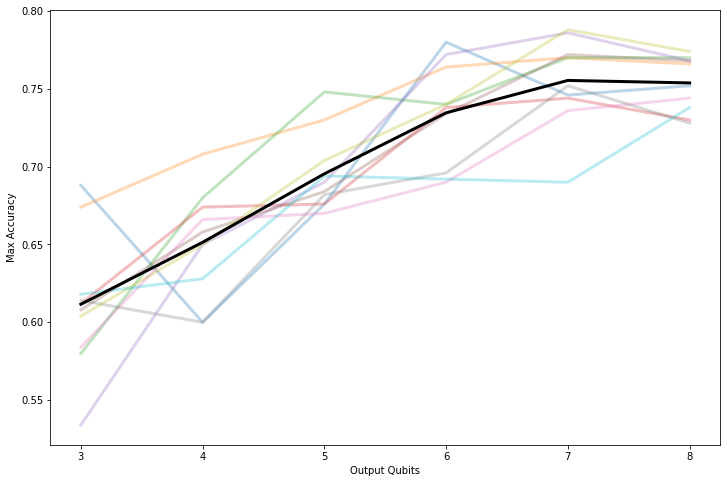

In [14]:
plt.figure(figsize=(12,8))

for i in range(len(data)):
    plt.plot(output_qubits, data[i, :], linewidth=3, alpha=0.3)

plt.plot(output_qubits, np.average(data, axis=0), linewidth=3, color="black")

plt.xlabel("Output Qubits")
plt.ylabel("Max Accuracy")

# plt.savefig("output_qubits_acc_3_classes.png", dpi=300, bbox_inches='tight')

In [7]:
np.var(data, axis=0)

array([0.00176304, 0.00106244, 0.00057764, 0.00096884, 0.00075844,
       0.00028036])

In [8]:
np.var(classical_runs)

0.0017131600000000018

In [9]:
np.average(classical_runs)

0.6201999999999999